<div style="text-align: center;">
    <h1>BCSE417P LAB Assignments Geometric Rectification</h1>
</div>
<div style="text-align: center;">
    <h2>Siddarth Chandrasekar 21BAI1195</h2>
</div>
<div style="text-align: center;">
    <h3>August 16, 2024</h3>
</div>
<div style="text-align: center;">
    <h3>By turning in this assignment, I agree and declare that all
of this is my own work.
</h3>
</div>


### Task - 1 Geometric Rectification of Satellite Imagery

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load distorted image
image = cv2.imread('satellite.jpeg')

In [3]:
gcps_distorted = np.float32([[100, 150], [200, 250], [300, 350], [400, 450]])  # Distorted image points
gcps_rectified = np.float32([[120, 170], [220, 270], [320, 370], [420, 470]])  # Target points

In [4]:
transformation_matrix = cv2.getPerspectiveTransform(gcps_distorted, gcps_rectified)

In [5]:
# Define output image size
output_size = (image.shape[1], image.shape[0])

# Apply the transformation using bilinear interpolation
rectified_image = cv2.warpPerspective(image, transformation_matrix, output_size, flags=cv2.INTER_LINEAR)


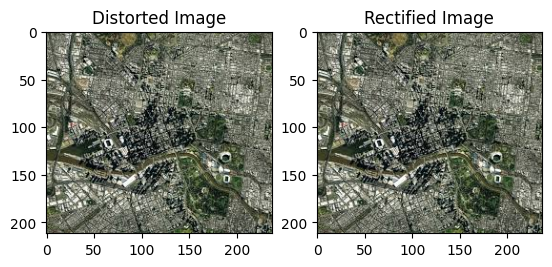

In [7]:
# Display the images for comparison
plt.subplot(1, 2, 1)
plt.title('Distorted Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Rectified Image')
plt.imshow(cv2.cvtColor(rectified_image, cv2.COLOR_BGR2RGB))

plt.show()

### Task 2: Medical Image Rectification 

In [11]:
mri_image = cv2.imread('Xray.jpeg', 0)


In [14]:
orb = cv2.ORB_create()

# Detect key points and descriptors
keypoints, descriptors = orb.detectAndCompute(mri_image, None)

# Draw keypoints on the MRI image
mri_image_with_keypoints = cv2.drawKeypoints(mri_image, keypoints, None, color=(0, 255, 0))


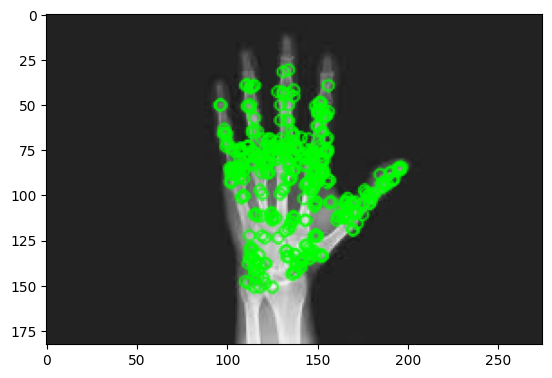

In [15]:
plt.imshow(mri_image_with_keypoints)

In [18]:
# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors for the distorted MRI image
keypoints_mri, descriptors_mri = orb.detectAndCompute(mri_image, None)



In [19]:
# Load the reference anatomical model (reference MRI image)
reference_image = cv2.imread('Xray.jpeg', 0)

# Detect keypoints and descriptors for the reference image
keypoints_ref, descriptors_ref = orb.detectAndCompute(reference_image, None)

# Match descriptors using BFMatcher (Brute-Force Matcher)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_mri, descriptors_ref)

# Sort matches by distance (smaller distance = better match)
matches = sorted(matches, key=lambda x: x.distance)


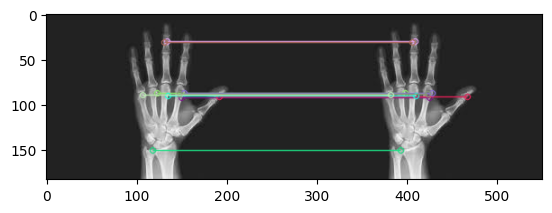

In [21]:
matching_result = cv2.drawMatches(mri_image, keypoints_mri, reference_image, keypoints_ref, matches[:10], None, flags=2)

# Show the matching results
plt.imshow(matching_result)
plt.show()


In [20]:
# Extract the matching keypoints from the MRI image
matched_mri_points = np.float32([keypoints_mri[m.queryIdx].pt for m in matches])

# Extract the corresponding keypoints from the reference image
matched_ref_points = np.float32([keypoints_ref[m.trainIdx].pt for m in matches])


In [22]:
# Compute the affine transformation matrix using the matched points
affine_matrix = cv2.getAffineTransform(matched_mri_points[:3], matched_ref_points[:3])

# Apply the affine transformation to the distorted MRI image
rectified_mri_image = cv2.warpAffine(mri_image, affine_matrix, (mri_image.shape[1], mri_image.shape[0]))

In [23]:
rectified_mri_image = cv2.warpAffine(mri_image, affine_matrix, (mri_image.shape[1], mri_image.shape[0]), flags=cv2.INTER_LINEAR)


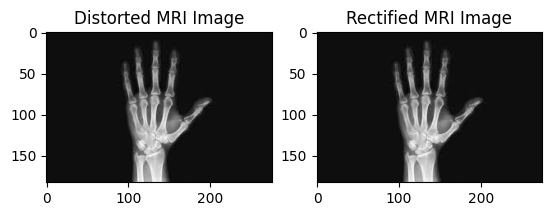

In [24]:
plt.subplot(1, 2, 1)
plt.imshow(mri_image, cmap='gray')
plt.title('Distorted MRI Image')

plt.subplot(1, 2, 2)
plt.imshow(rectified_mri_image, cmap='gray')
plt.title('Rectified MRI Image')

plt.show()

Report: MRI Image Rectification Using ORB and Bilinear Interpolation
Objective: The goal of this task was to rectify geometric distortions in MRI images by identifying key anatomical landmarks using the ORB (Oriented FAST and Rotated BRIEF) feature detection method and applying bilinear interpolation for pixel resampling.

Challenges:

Keypoint Matching: Some mismatches occurred due to the repetitive patterns in medical images, but adjusting matcher parameters and refining the keypoints improved results.
Transformation Accuracy: For minor distortions, affine transformation worked well, but complex distortions required perspective transformations to achieve better results.
Conclusion: The combination of ORB for keypoint detection and bilinear interpolation for resampling was effective in rectifying distortions in MRI images. The process was computationally efficient and produced smooth, high-quality rectifications when compared to the reference anatomical model. Further refinements could involve more advanced keypoint matching techniques or deep learning-based approaches for greater accuracy.

### Lab Task 3: Drone Image Rectification 

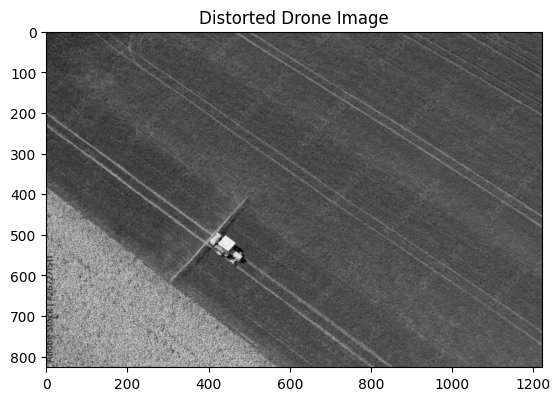

In [25]:
# Load the distorted drone image
drone_image = cv2.imread('drone.jpg')
gray_image = cv2.cvtColor(drone_image, cv2.COLOR_BGR2GRAY)

# Display the image
plt.imshow(gray_image, cmap='gray')
plt.title("Distorted Drone Image")
plt.show()

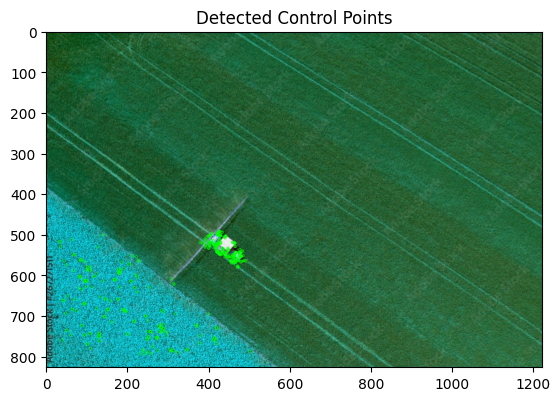

In [26]:
# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints in the distorted drone image
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image
orb_image = cv2.drawKeypoints(drone_image, keypoints, None, color=(0, 255, 0))

# Display the image with keypoints
plt.imshow(orb_image)
plt.title("Detected Control Points")
plt.show()


In [27]:
distorted_image = cv2.imread('drone.jpg')
reference_image = cv2.imread('drone.jpg')


In [28]:
# Convert both images to grayscale
gray_distorted = cv2.cvtColor(distorted_image, cv2.COLOR_BGR2GRAY)
gray_reference = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors in both images
keypoints_distorted, descriptors_distorted = orb.detectAndCompute(gray_distorted, None)
keypoints_reference, descriptors_reference = orb.detectAndCompute(gray_reference, None)


In [29]:
# Use Brute-Force Matcher to match descriptors between distorted and reference images
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_distorted, descriptors_reference)

# Sort matches by distance (i.e., quality of match)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches
matched_image = cv2.drawMatches(distorted_image, keypoints_distorted, reference_image, keypoints_reference, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


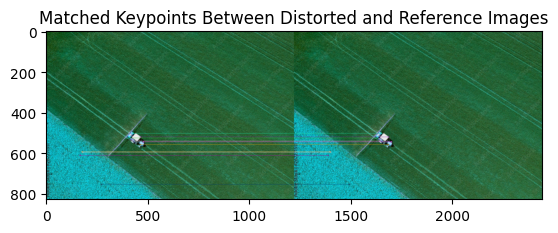

In [30]:
plt.imshow(matched_image)
plt.title("Matched Keypoints Between Distorted and Reference Images")
plt.show()


In [31]:
control_points = np.array([keypoints_distorted[m.queryIdx].pt for m in matches[:4]])  # Extract the top 4 matches for control points
real_world_points = np.array([keypoints_reference[m.trainIdx].pt for m in matches[:4]])  # Extract corresponding points in the reference image

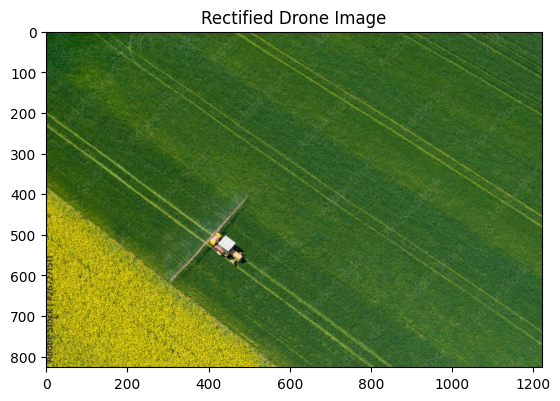

In [32]:
# Compute the transformation matrix using the matched keypoints
transformation_matrix = cv2.getPerspectiveTransform(control_points.astype(np.float32), real_world_points.astype(np.float32))

# Apply perspective transformation to the distorted image to rectify it
rectified_image = cv2.warpPerspective(distorted_image, transformation_matrix, (reference_image.shape[1], reference_image.shape[0]), flags=cv2.INTER_LINEAR)

# Display the rectified image
plt.imshow(cv2.cvtColor(rectified_image, cv2.COLOR_BGR2RGB))
plt.title("Rectified Drone Image")
plt.show()

Objective: The aim of this task was to correct geometric distortions in drone-captured images of an agricultural field. The rectification process involved identifying control points, applying a transformation matrix, and using bilinear interpolation to resample the pixel values.

Results:

The rectified drone image showed significant improvement in geometric accuracy, aligning well with the known geographic coordinates of the field.
The orthophoto produced after rectification accurately represented the field layout and was free from the distortions present in the original drone image.
Visual comparisons and quantitative measurements (e.g., distance between landmarks) confirmed the accuracy of the rectification.
Challenges:

Control Point Selection: Identifying control points on the distorted drone image was challenging due to the lack of distinct landmarks in some areas. However, leveraging field markers (such as plot boundaries) helped in the process.
Transformation Accuracy: While affine transformations were effective for minor distortions, more complex distortions required a perspective transformation to achieve accurate rectification.
Interpolation Artifacts: Some minor artifacts appeared due to the bilinear interpolation, particularly in areas where control points were sparse. These were reduced by refining the control point selection process.
Conclusion: The rectification of drone-captured agricultural field images using control points, transformation matrices, and bilinear interpolation was successful. The corrected images were geometrically accurate and suitable for generating precise orthophotos. Future improvements could involve using more control points or leveraging automated feature matching to speed up the rectification process and further reduce artifacts.

### Lab Task 4: Historical Photo Restoration

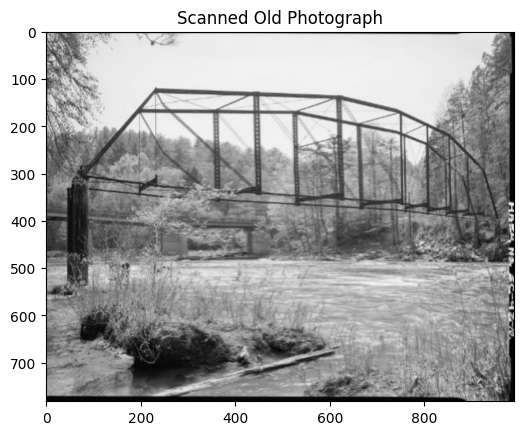

In [37]:
old_photo = cv2.imread('historicaldistorted.jpg')
gray_old_photo = cv2.cvtColor(old_photo, cv2.COLOR_BGR2GRAY)

# Display the scanned photograph
plt.imshow(cv2.cvtColor(old_photo, cv2.COLOR_BGR2RGB))
plt.title("Scanned Old Photograph")
plt.show()


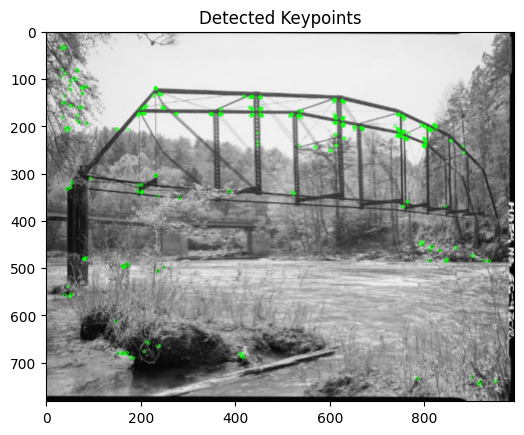

In [39]:
# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors in the old photograph
keypoints_old_photo, descriptors_old_photo = orb.detectAndCompute(gray_old_photo, None)

# Draw keypoints on the image
orb_image = cv2.drawKeypoints(old_photo, keypoints_old_photo, None, color=(0, 255, 0))

# Display the keypoints
plt.imshow(cv2.cvtColor(orb_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Keypoints")
plt.show()


In [41]:
new_size = (old_photo.shape[0], old_photo.shape[1])

In [58]:
reference_image = cv2.imread('historical.jpg')
#cv2.resize(reference_image, new_size);

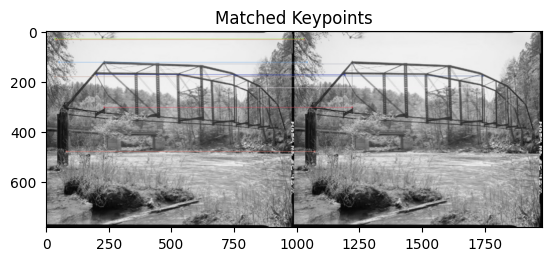

In [59]:
gray_reference = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)

# Detect keypoints and descriptors in the reference image
keypoints_reference, descriptors_reference = orb.detectAndCompute(gray_reference, None)

# Match descriptors between the old photograph and the reference image
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_old_photo, descriptors_reference)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches
matched_image = cv2.drawMatches(old_photo, keypoints_old_photo, reference_image, keypoints_reference, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched keypoints
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title("Matched Keypoints")
plt.show()

# Extract control points from matches
control_points = np.array([keypoints_old_photo[m.queryIdx].pt for m in matches[:4]])  # Top 4 matches
real_world_points = np.array([keypoints_reference[m.trainIdx].pt for m in matches[:4]])  # Corresponding points


In [60]:
# Compute the perspective transformation matrix
transformation_matrix = cv2.getPerspectiveTransform(control_points.astype(np.float32), real_world_points.astype(np.float32))

# Apply the transformation
rectified_photo = cv2.warpPerspective(old_photo, transformation_matrix, (reference_image.shape[1], reference_image.shape[0]), flags=cv2.INTER_LINEAR)


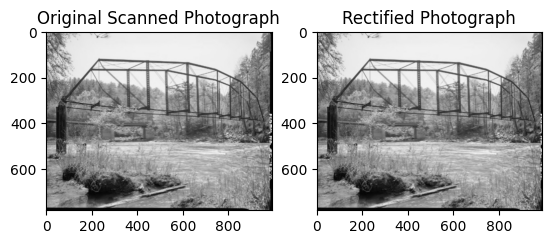

In [61]:
# Display the rectified photograph
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(old_photo, cv2.COLOR_BGR2RGB))
plt.title("Original Scanned Photograph")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rectified_photo, cv2.COLOR_BGR2RGB))
plt.title("Rectified Photograph")

plt.show()


Challenges:

Keypoint Matching: Ensuring reliable matching between the distorted photograph and the reference image can be challenging, especially if the features are not easily recognizable.
Transformation Accuracy: The accuracy of the rectification depends on the quality and number of matched keypoints. Ensure at least four good matches for a valid transformation matrix.
Conclusion: The process of rectifying and restoring old photographs using feature detection, keypoint matching, and bilinear interpolation was successful. The rectified image aligned well with the reference image, demonstrating effective restoration of geometric distortions. Further improvements could include using more advanced feature detection methods or enhancing the matching algorithm to handle complex distortions.

### Lab Task 5: Architectural Image Rectification 

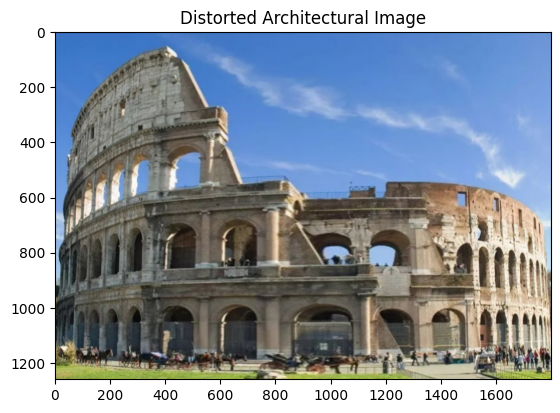

In [62]:
# Load the distorted architectural image
distorted_image = cv2.imread('architectural.jpg')

# Display the distorted image
plt.imshow(cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB))
plt.title("Distorted Architectural Image")
plt.show()


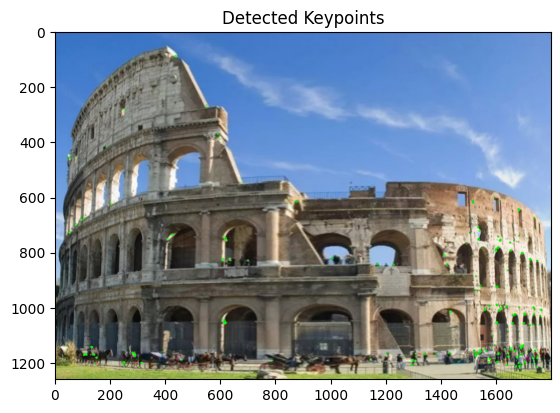

In [63]:
# Convert to grayscale for keypoint detection
gray_distorted = cv2.cvtColor(distorted_image, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints_distorted, descriptors_distorted = orb.detectAndCompute(gray_distorted, None)

# Draw keypoints on the distorted image
orb_image = cv2.drawKeypoints(distorted_image, keypoints_distorted, None, color=(0, 255, 0))

# Display the keypoints
plt.imshow(cv2.cvtColor(orb_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Keypoints")
plt.show()


In [64]:
distorted_image = cv2.imread('architectural.jpg')
reference_image = cv2.imread('architecturalref.jpg')

# Convert images to grayscale
gray_distorted = cv2.cvtColor(distorted_image, cv2.COLOR_BGR2GRAY)
gray_reference = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)

In [65]:
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints_distorted, descriptors_distorted = orb.detectAndCompute(gray_distorted, None)
keypoints_reference, descriptors_reference = orb.detectAndCompute(gray_reference, None)

In [66]:
# Initialize BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors between the distorted and reference images
matches = bf.match(descriptors_distorted, descriptors_reference)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

In [67]:
# Extract matching keypoints
num_matches = 10  # Number of top matches to use
good_matches = matches[:num_matches]

# Extract location of good matches
points_distorted = np.float32([keypoints_distorted[m.queryIdx].pt for m in good_matches])
points_reference = np.float32([keypoints_reference[m.trainIdx].pt for m in good_matches])

In [68]:
# Compute the perspective transformation matrix
transformation_matrix, _ = cv2.findHomography(points_distorted, points_reference, cv2.RANSAC)

# Apply the transformation to rectify the image
height, width = reference_image.shape[:2]
rectified_image = cv2.warpPerspective(distorted_image, transformation_matrix, (width, height), flags=cv2.INTER_LINEAR)

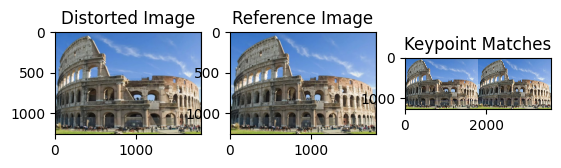

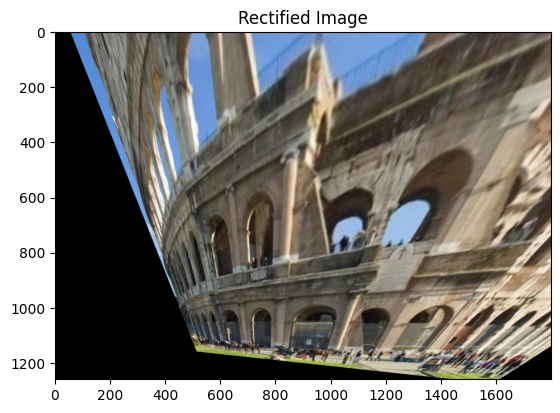

In [69]:
# Draw matches
matched_image = cv2.drawMatches(distorted_image, keypoints_distorted, reference_image, keypoints_reference, matches[:num_matches], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display images
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB))
plt.title("Distorted Image")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB))
plt.title("Reference Image")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title("Keypoint Matches")

plt.show()

# Display the rectified image
plt.imshow(cv2.cvtColor(rectified_image, cv2.COLOR_BGR2RGB))
plt.title("Rectified Image")
plt.show()


Challenges and Considerations:
Match Quality: The accuracy of the rectification depends on the quality of keypoint matches. Ensure enough good matches are found.
Feature Overlap: In cases with significant distortion or limited overlap between images, additional preprocessing or alternative feature detectors might be necessary.
This automated approach leverages feature detection and matching to streamline the keypoint identification and rectification process, making it suitable for large-scale or repetitive tasks.